<center>

# STROJNO UČENJE

## Projekt

## **Predviđanje cijene goriva**

</center>


Studentica: Laura Boras

##1. Učitavanje i priprema podataka za daljnu analizu

In [ ]:
#Učitavanje paketa:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
%cd /content/drive/MyDrive/SU/Projekt

/content/drive/MyDrive/SU/Projekt


In [ ]:
#Učitavanje podataka:
data = pd.read_csv("gasoline.csv")

In [ ]:
#Ispis prvih 5 članova:
data.head()

,pump_id,gasoline_type,price,self_service,last_update,operator,brand,pump_type,address,city,county,lat,lon,date,days_last_update
0,6492,Hi-Q Diesel,1.644,1,2021-11-26,SERVIZI & GESTIONI ITALIA srl,Q8,Altro,VIA VERDI 33 31046,ODERZO,TV,45.788584,12.501064,2021-12-01,5
1,6612,Hi-Q Diesel,1.669,1,2021-11-24,SERVIZI & GESTIONI ITALIA srl,Q8,Altro,S.S.16 ADRIATICA KM 355+011 - LIDO DI FERMO SN...,FERMO,FM,43.206394,13.782892,2021-12-01,7
2,6484,Hi-Q Diesel,1.674,1,2021-11-29,SERVIZI & GESTIONI ITALIA srl,Q8,Altro,IV NOVEMBRE 32 31058,SUSEGANA,TV,45.823834,12.254606,2021-12-01,2
3,6503,Hi-Q Diesel,1.676,1,2021-11-24,SERVIZI & GESTIONI ITALIA srl,Q8,Altro,C. GALLIANO 19/D 37144,VERONA,VR,45.439028,10.975097,2021-12-01,7
4,6632,Hi-Q Diesel,1.669,1,2021-11-29,SERVIZI & GESTIONI ITALIA srl,Q8,Altro,VIA GIOVANNI GRONCHI - LOC.VICERE' SNC 00040,POMEZIA,RM,41.646112,12.506021,2021-12-01,2


In [ ]:
#Ispis posljednjih 5 članova:
data.tail()

,pump_id,gasoline_type,price,self_service,last_update,operator,brand,pump_type,address,city,county,lat,lon,date,days_last_update
93120,34541,Blue Diesel,1.724,0,2021-11-30,SOCIETA' ITALIANA GAS LIQUIDI S.P.A.,Agip Eni,Altro,Via Einaudi/Sonnino snc 62012,CIVITANOVA MARCHE,MC,43.292113,13.706554,2021-12-01,1
93121,40619,Benzina,1.769,1,2021-11-30,SAXOIL S.A.S. DI SALA ALESSANDRO & C.,Api-Ip,Altro,VIA MONTANARA 67 41049,SASSUOLO,MO,44.529497,10.774392,2021-12-01,1
93122,40619,Gasolio,1.659,0,2021-11-30,SAXOIL S.A.S. DI SALA ALESSANDRO & C.,Api-Ip,Altro,VIA MONTANARA 67 41049,SASSUOLO,MO,44.529497,10.774392,2021-12-01,1
93123,40619,Gasolio,1.659,1,2021-11-30,SAXOIL S.A.S. DI SALA ALESSANDRO & C.,Api-Ip,Altro,VIA MONTANARA 67 41049,SASSUOLO,MO,44.529497,10.774392,2021-12-01,1
93124,40619,Benzina,1.769,0,2021-11-30,SAXOIL S.A.S. DI SALA ALESSANDRO & C.,Api-Ip,Altro,VIA MONTANARA 67 41049,SASSUOLO,MO,44.529497,10.774392,2021-12-01,1


In [ ]:
#Provjerimo koja se vrsta goriva najčešće javlja:
data.gasoline_type.value_counts()

Benzina                     34696
Gasolio                     34578
Blue Diesel                  6018
GPL                          4527
Blue Super                   2921
Hi-Q Diesel                  1942
Metano                       1486
Gasolio Premium              1358
Supreme Diesel                992
HiQ Perform+                  915
Gasolio speciale              754
Excellium Diesel              520
Benzina speciale              328
Benzina WR 100                274
Gasolio Oro Diesel            271
Gasolio artico                262
Gasolio Alpino                189
DieselMax                     138
GNL                           115
Benzina Plus 98               101
L-GNC                          95
S-Diesel                       86
Diesel e+10                    84
GP DIESEL                      79
Blu Diesel Alpino              77
Gasolio Ecoplus                61
F101                           50
Gasolio Gelo                   45
E-DIESEL                       43
Gasolio Artico

### 1.1. Stvaranje dataseta data_Benzina

In [ ]:
#Izdvojimo podatke vezane uz tip goriva Benzina:
data_Benzina = data[data['gasoline_type'] == 'Benzina']

#Resetiramo indekse:
data_Benzina.reset_index(inplace=True, drop=True)

In [ ]:
#Ispis prvih 5 članova:
data_Benzina.head()

,pump_id,gasoline_type,price,self_service,last_update,operator,brand,pump_type,address,city,county,lat,lon,date,days_last_update
0,3639,Benzina,1.759,1,2021-11-29,"F.LLI CANNIZZO FABIO, FILIPPO, GAETANO & C. S....",Tamoil,Autostradale,"Autostrada A18 MESSINA-CATANIA, Km. 42.9, dir....",TAORMINA,ME,37.824035,15.246266,2021-12-01,2
1,21385,Benzina,1.850,0,2021-11-28,BAR L'ALPINO DI MONTAGNA ANTONELLA,Pompe Bianche,Altro,FRAZIONE COSTA CAVALIERI 1/A 27040,FORTUNAGO,PV,44.914449,9.191037,2021-12-01,3
2,19843,Benzina,1.350,1,2021-11-17,EUROPETROLIO S.R.L.,Pompe Bianche,Altro,VIALE DELLA RESISTENZA 135 80012,CALVIZZANO,NaN,40.907763,14.173637,2021-12-01,14
3,31606,Benzina,1.559,0,2021-11-30,CORO S.R.L.,Q8,Altro,via S.P. 108 km. 2+250 loc. Palazzo 88046,LAMEZIA TERME,CZ,38.917854,16.290402,2021-12-01,1
4,29999,Benzina,1.484,1,2021-11-23,MARRONCELLI & C. SOCIETA' IN ACCOMANDITA SEMPL...,Agip Eni,Altro,VIA OCCIDENTALE snc 66016,GUARDIAGRELE,CH,42.193186,14.220181,2021-12-01,8


In [ ]:
#Ispis posljednjih 5 članova:
data_Benzina.tail()

,pump_id,gasoline_type,price,self_service,last_update,operator,brand,pump_type,address,city,county,lat,lon,date,days_last_update
34691,8863,Benzina,1.709,1,2021-11-30,BURTONE GIUSEPPE E C. S.N.C.,Q8,Altro,VIA MATTEI 11-13 40138,BOLOGNA,BO,44.494183,11.396123,2021-12-01,1
34692,8863,Benzina,1.889,0,2021-11-30,BURTONE GIUSEPPE E C. S.N.C.,Q8,Altro,VIA MATTEI 11-13 40138,BOLOGNA,BO,44.494183,11.396123,2021-12-01,1
34693,34541,Benzina,1.774,0,2021-11-30,SOCIETA' ITALIANA GAS LIQUIDI S.P.A.,Agip Eni,Altro,Via Einaudi/Sonnino snc 62012,CIVITANOVA MARCHE,MC,43.292113,13.706554,2021-12-01,1
34694,40619,Benzina,1.769,1,2021-11-30,SAXOIL S.A.S. DI SALA ALESSANDRO & C.,Api-Ip,Altro,VIA MONTANARA 67 41049,SASSUOLO,MO,44.529497,10.774392,2021-12-01,1
34695,40619,Benzina,1.769,0,2021-11-30,SAXOIL S.A.S. DI SALA ALESSANDRO & C.,Api-Ip,Altro,VIA MONTANARA 67 41049,SASSUOLO,MO,44.529497,10.774392,2021-12-01,1


###1.2. Pročišćavanje podataka

In [ ]:
data_Benzina.duplicated().sum()

0

In [ ]:
data_Benzina.isna().sum()

pump_id                0
gasoline_type          0
price                  0
self_service           0
last_update            0
operator             127
brand                121
pump_type            121
address              121
city                 121
county              1383
lat                  140
lon                  140
date                   0
days_last_update       0
dtype: int64

In [ ]:
data_Benzina.fillna(data_Benzina.median)

,pump_id,gasoline_type,price,self_service,last_update,operator,brand,pump_type,address,city,county,lat,lon,date,days_last_update
0,3639,Benzina,1.759,1,2021-11-29,"F.LLI CANNIZZO FABIO, FILIPPO, GAETANO & C. S....",Tamoil,Autostradale,"Autostrada A18 MESSINA-CATANIA, Km. 42.9, dir....",TAORMINA,ME,37.824035,15.246266,2021-12-01,2
1,21385,Benzina,1.850,0,2021-11-28,BAR L'ALPINO DI MONTAGNA ANTONELLA,Pompe Bianche,Altro,FRAZIONE COSTA CAVALIERI 1/A 27040,FORTUNAGO,PV,44.914449,9.191037,2021-12-01,3
2,19843,Benzina,1.350,1,2021-11-17,EUROPETROLIO S.R.L.,Pompe Bianche,Altro,VIALE DELLA RESISTENZA 135 80012,CALVIZZANO,<bound method NDFrame._add_numeric_operations....,40.907763,14.173637,2021-12-01,14
3,31606,Benzina,1.559,0,2021-11-30,CORO S.R.L.,Q8,Altro,via S.P. 108 km. 2+250 loc. Palazzo 88046,LAMEZIA TERME,CZ,38.917854,16.290402,2021-12-01,1
4,29999,Benzina,1.484,1,2021-11-23,MARRONCELLI & C. SOCIETA' IN ACCOMANDITA SEMPL...,Agip Eni,Altro,VIA OCCIDENTALE snc 66016,GUARDIAGRELE,CH,42.193186,14.220181,2021-12-01,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34691,8863,Benzina,1.709,1,2021-11-30,BURTONE GIUSEPPE E C. S.N.C.,Q8,Altro,VIA MATTEI 11-13 40138,BOLOGNA,BO,44.494183,11.396123,2021-12-01,1
34692,8863,Benzina,1.889,0,2021-11-30,BURTONE GIUSEPPE E C. S.N.C.,Q8,Altro,VIA MATTEI 11-13 40138,BOLOGNA,BO,44.494183,11.396123,2021-12-01,1
34693,34541,Benzina,1.774,0,2021-11-30,SOCIETA' ITALIANA GAS LIQUIDI S.P.A.,Agip Eni,Altro,Via Einaudi/Sonnino snc 62012,CIVITANOVA MARCHE,MC,43.292113,13.706554,2021-12-01,1
34694,40619,Benzina,1.769,1,2021-11-30,SAXOIL S.A.S. DI SALA ALESSANDRO & C.,Api-Ip,Altro,VIA MONTANARA 67 41049,SASSUOLO,MO,44.529497,10.774392,2021-12-01,1


###1.3. Eksplorativna analiza podataka

In [ ]:
data_Benzina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34696 entries, 0 to 34695
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pump_id           34696 non-null  int64  
 1   gasoline_type     34696 non-null  object 
 2   price             34696 non-null  float64
 3   self_service      34696 non-null  int64  
 4   last_update       34696 non-null  object 
 5   operator          34569 non-null  object 
 6   brand             34575 non-null  object 
 7   pump_type         34575 non-null  object 
 8   address           34575 non-null  object 
 9   city              34575 non-null  object 
 10  county            33313 non-null  object 
 11  lat               34556 non-null  float64
 12  lon               34556 non-null  float64
 13  date              34696 non-null  object 
 14  days_last_update  34696 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 4.0+ MB


In [ ]:
data_Benzina.describe().T

,count,mean,std,min,25%,50%,75%,max
pump_id,34696.0,31052.955845,14520.572992,3464.000000,18016.000000,33401.000000,44215.250000,51703.000000
price,34696.0,1.785214,0.132557,0.001000,1.719000,1.757000,1.839000,2.444000
self_service,34696.0,0.573121,0.494632,0.000000,0.000000,1.000000,1.000000,1.000000
lat,34556.0,42.793854,2.567184,36.684483,40.918197,43.273066,45.159430,46.946944
lon,34556.0,12.236715,2.620155,6.709295,10.202003,12.328495,14.220212,18.496371
days_last_update,34696.0,20.655782,63.943763,1.000000,2.000000,5.000000,8.000000,462.000000


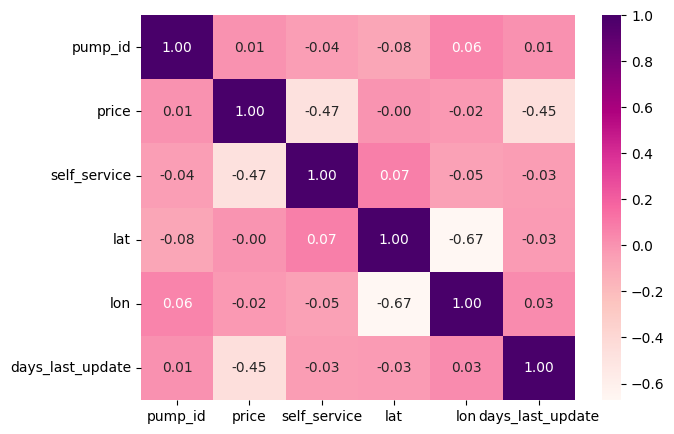

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(data_Benzina.corr(numeric_only=True, method="pearson"), annot=True, cmap="RdPu", fmt='.2f')  #annot - ako je True prikazat ce se vrijednosti na svakom polju, cmap = color map
plt.show()

Iz matrice korelacije ne uočavamo niti jedu značajku koja je visoko kolerirana sa značajkom 'price' koju ciljamo predvidjeti.

###1.4. Priprema podataka za analizu vremenskih nizova

In [ ]:
#Iz data_Benzina izdavajmo samo stupce "last_update" i "price" koje preimenujemo u "ds" odnosno "y" redom:
df = data_Benzina[['last_update', 'price']]
df.rename(columns={'last_update': 'ds', 'price' : 'y'}, inplace=True)

# Pretvaranje stupca s datumima u datetime format:
df['ds'] = pd.to_datetime(df['ds'])

#Ispis prvih 5 članova iz ds:
df.head()

<ipython-input-252-d919bd6ca6ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'last_update': 'ds', 'price' : 'y'}, inplace=True)
<ipython-input-252-d919bd6ca6ea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])


,ds,y
0,2021-11-29,1.759
1,2021-11-28,1.850
2,2021-11-17,1.350
3,2021-11-30,1.559
4,2021-11-23,1.484


In [ ]:
#Budući da se neki datumi ponavljaju, pomoću groupby-a osiguravamo jedinstvenost svakog datuma
#te mu pridružujemo vrijednost u stupcu y koja je jednaka aritmetičkoj sredini svih vrijednosti stupca y na taj datum
df=df.groupby('ds')['y'].mean().reset_index()

In [ ]:
#Provjeravamo javlja li se svaki datum točno jednom:
df.ds.value_counts()

2020-08-26    1
2021-08-20    1
2021-07-18    1
2021-07-17    1
2021-07-16    1
             ..
2021-02-04    1
2021-02-03    1
2021-02-02    1
2021-02-01    1
2021-11-30    1
Name: ds, Length: 387, dtype: int64

In [ ]:
#Provjerimo koji se sve datumi javljaju:
df.ds

0     2020-08-26
1     2020-08-31
2     2020-09-01
3     2020-09-02
4     2020-09-03
         ...    
382   2021-11-26
383   2021-11-27
384   2021-11-28
385   2021-11-29
386   2021-11-30
Name: ds, Length: 387, dtype: datetime64[ns]

*Uočavamo da navedeni datumi nisu međusobno jednako udaljeni.<br>
Kako bismo koristili vremenske nizove potrebno je dopuniti nedostajeće datume između 2020-08-26 i 2021-11-30 te ćemo pomoću linearne interpolacije popuniti y vrijednost vezanu za novi datum.<br>*

In [ ]:
#Stvaranje potpunog niza datuma između minimalnog i maksimalnog datuma:
min_datum = df['ds'].min()
max_datum = df['ds'].max()
potpuni_niz_datuma = pd.date_range(min_datum, max_datum, freq='D')

#Stvaranje DataFrame-a s potpunim nizom datuma:
potpuni_df = pd.DataFrame({'ds': potpuni_niz_datuma})

#Spajanje originalnog DataFrame-a s potpunim DataFrame-om
df = pd.merge(potpuni_df, df, on='ds', how='left')

In [ ]:
df

,ds,y
0,2020-08-26,1.434000
1,2020-08-27,NaN
2,2020-08-28,NaN
3,2020-08-29,NaN
4,2020-08-30,NaN
...,...,...
457,2021-11-26,1.800663
458,2021-11-27,1.808710
459,2021-11-28,1.808488
460,2021-11-29,1.786671


In [ ]:
#Sada želimo nadopuniti nedostajuće vrijednosti u y stupcu:
df["y"] = df["y"].interpolate(method='linear')

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])
df

,ds,y
0,2020-08-26,1.434000
1,2020-08-27,1.449600
2,2020-08-28,1.465200
3,2020-08-29,1.480800
4,2020-08-30,1.496400
...,...,...
457,2021-11-26,1.800663
458,2021-11-27,1.808710
459,2021-11-28,1.808488
460,2021-11-29,1.786671


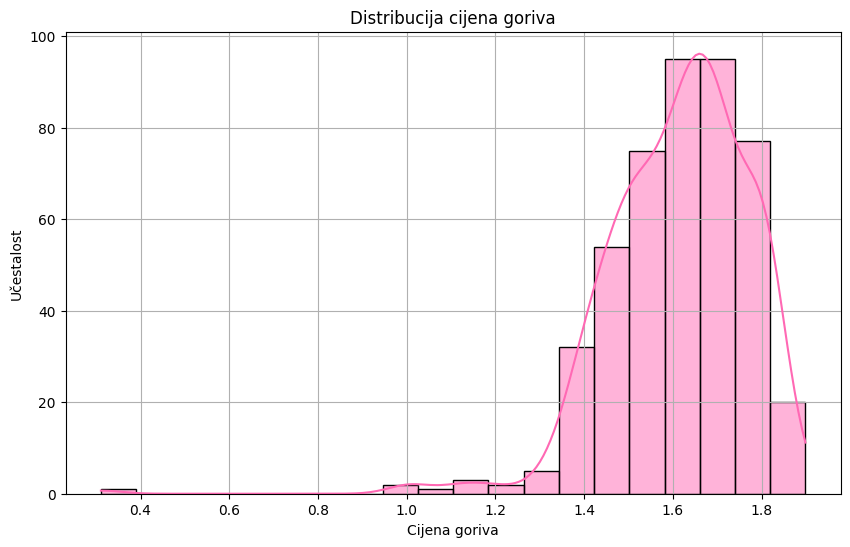

In [ ]:
#Prikazivanje distribucije cijena goriva pomoću histograma može nam pomoći uočiti učestalost određenih raspona cijena.
plt.figure(figsize=(10, 6))
sns.histplot(df['y'], bins=20, kde=True, color="hotpink")
plt.title('Distribucija cijena goriva')
plt.xlabel('Cijena goriva')
plt.ylabel('Učestalost')
plt.grid(True)
plt.show()

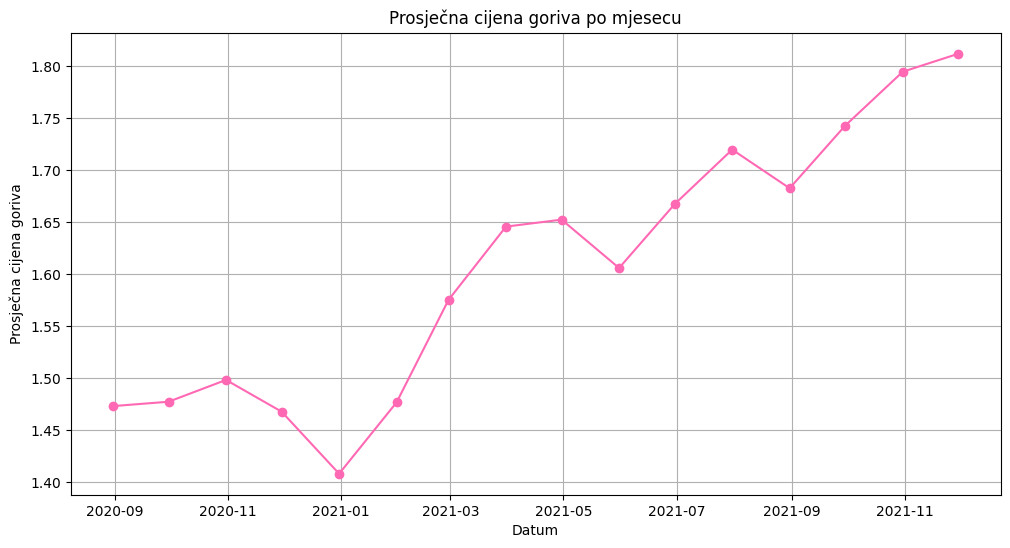

In [ ]:
novi_df=df[['ds','y']]
# Pretvaranje stupca 'ds' u DateTimeIndex
novi_df['ds'] = pd.to_datetime(novi_df['ds'])

#postavljamo datum za indeksni skup:
novi_df.set_index('ds', inplace=True)

# Resampling po mjesecu i izračun prosječne cijene
novi_df_resampled = novi_df.resample('M').mean()

# Vizualizacija linijskim grafom
plt.figure(figsize=(12, 6))
plt.plot(novi_df_resampled.index, novi_df_resampled['y'], marker='o', linestyle='-', color="hotpink")
plt.title('Prosječna cijena goriva po mjesecu')
plt.xlabel('Datum')
plt.ylabel('Prosječna cijena goriva')
plt.grid(True)
plt.show()

Vizualna procjena vremenskog niza:

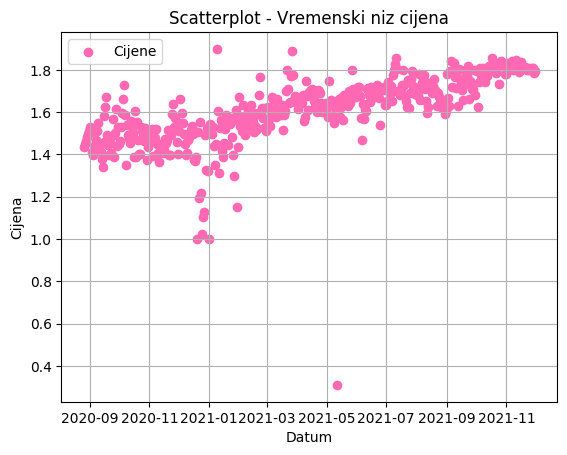

In [ ]:
#Pogledajtmo grafikon vremenskog niza kako bistmo dobili osnovnu predodžbu o trendovima i sezonskim uzorcima.

#Vizualna procjena vremenskog niza pomoću scatterplota
plt.scatter(df['ds'], df['y'], label='Cijene', color='hotpink', marker='o')

plt.title('Scatterplot - Vremenski niz cijena')
plt.xlabel('Datum')
plt.ylabel('Cijena')
plt.legend()
plt.grid(True)
plt.show()

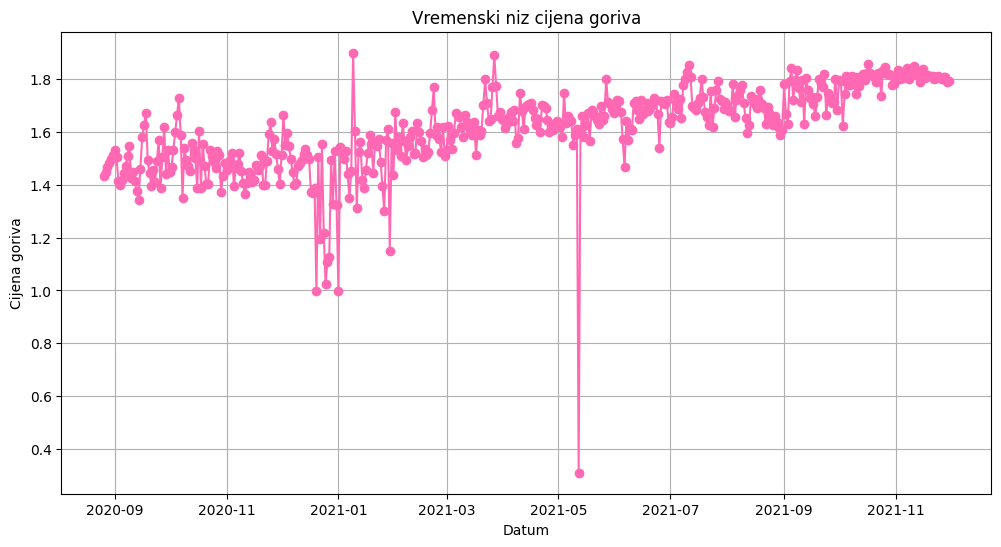

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(novi_df.index, df['y'], marker='o', linestyle='-', color="hotpink")
plt.title('Vremenski niz cijena goriva')
plt.xlabel('Datum')
plt.ylabel('Cijena goriva')
plt.grid(True)
plt.show()

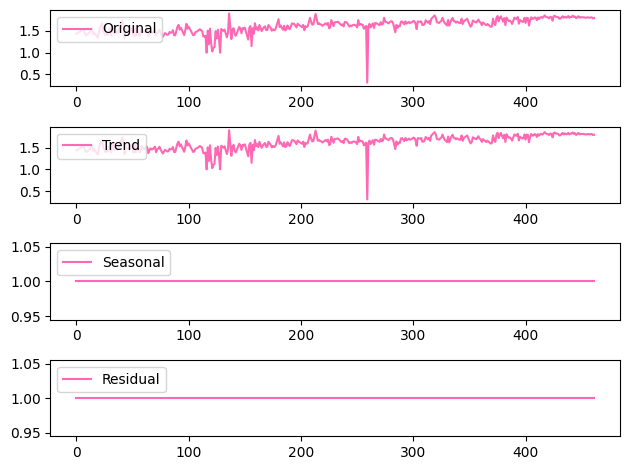

In [ ]:
# #dekompozicija vremenskog niza
from statsmodels.tsa.seasonal import seasonal_decompose
# # Dekompozicija vremenskog niza
result = seasonal_decompose(df['y'], model='multiplicative', period=1)  # Period možete prilagoditi prema sezonalnosti (za additive je konstanta 0)

plt.subplot(4, 1, 1)
plt.plot(df['y'], label='Original',color='hotpink')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend',color='hotpink')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal',color='hotpink')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual',color='hotpink')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Uočimo da naši podaci nemaju trendove (za trend nam ispiše sve) te nisu sezonalni.

##2. AUTO-ARIMA model

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split

In [ ]:
novi_df #Treba nam ovakav oblik podataka

,y
ds,
2020-08-26,1.434000
2020-08-27,1.449600
2020-08-28,1.465200
2020-08-29,1.480800
2020-08-30,1.496400
...,...
2021-11-26,1.800663
2021-11-27,1.808710
2021-11-28,1.808488


In [ ]:
# Podjela DataFrame-a na trening i test set
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

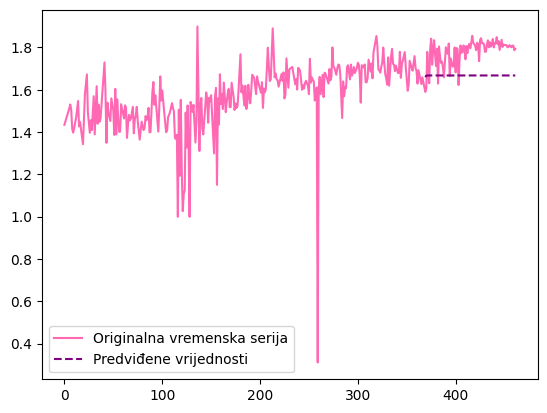

In [ ]:
# Postavljanje seasonal=False kako biste isključili sezonske komponente
model =auto_arima(train_data['y'], seasonal=False)

# Predviđanje na test setu
predictions = model.predict(n_periods=len(test_data))

# Vizualizacija rezultata
plt.plot(df.index, df['y'], label='Originalna vremenska serija',color='hotpink')
plt.plot(test_data.index, predictions, label='Predviđene vrijednosti', linestyle='dashed',color='purple')
plt.legend()
plt.show()

In [ ]:
predictions

369    1.659734
370    1.666350
371    1.667282
372    1.667413
373    1.667432
         ...   
457    1.667435
458    1.667435
459    1.667435
460    1.667435
461    1.667435
Length: 93, dtype: float64

Uočavamo kako smo za predviđene vrijednosti dobili konstantu.<br>
Unatoč postavljanju vrijednosti sesnoal=False ovaj algoritam nije napravio dobar posao za zadane podatke.<br>
Također, bez obzira koje vrijednosti uzeli za p,d i q (order=(p,d,q)) dobijemo podjednako loše predviđanje.


##3. PROPHET model

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import prophet
from prophet import Prophet

Iz dostupnih podataka izdvojit ćemo prvih 80% na kojima ćemo istrenirati model.<br>
Zatim ćemo na preostalim podacima testirati model te odrediti mse i mae.

In [ ]:
df

,ds,y
0,2020-08-26,1.434000
1,2020-08-27,1.449600
2,2020-08-28,1.465200
3,2020-08-29,1.480800
4,2020-08-30,1.496400
...,...,...
457,2021-11-26,1.800663
458,2021-11-27,1.808710
459,2021-11-28,1.808488
460,2021-11-29,1.786671


In [ ]:
#djelimo na train i test
train_size = int(len(df) * 0.8)  # 80% za trening, 20% za test
train, test = df[:train_size], df[train_size:]

In [ ]:
#izrada i treniranje model
model = Prophet()
model.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfsvcu_0s/ot_p0m5m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfsvcu_0s/g7uglr2h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30208', 'data', 'file=/tmp/tmpfsvcu_0s/ot_p0m5m.json', 'init=/tmp/tmpfsvcu_0s/g7uglr2h.json', 'output', 'file=/tmp/tmpfsvcu_0s/prophet_modelfxjocts3/prophet_model-20240124202038.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:20:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:20:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Predviđanje cijena za buduće datume (testni skup):
forecast = model.predict(test)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-30,1.722614,1.598309,1.876225,1.722614,1.722614,0.015779,0.015779,0.015779,0.015779,0.015779,0.015779,0.0,0.0,0.0,1.738393
1,2021-08-31,1.723315,1.581280,1.875669,1.723315,1.723315,0.009613,0.009613,0.009613,0.009613,0.009613,0.009613,0.0,0.0,0.0,1.732928
2,2021-09-01,1.724016,1.571858,1.859705,1.724016,1.724016,-0.009591,-0.009591,-0.009591,-0.009591,-0.009591,-0.009591,0.0,0.0,0.0,1.714424
3,2021-09-02,1.724716,1.566722,1.847752,1.724704,1.724740,-0.015432,-0.015432,-0.015432,-0.015432,-0.015432,-0.015432,0.0,0.0,0.0,1.709284
4,2021-09-03,1.725417,1.564827,1.858619,1.725361,1.725489,-0.013727,-0.013727,-0.013727,-0.013727,-0.013727,-0.013727,0.0,0.0,0.0,1.711691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2021-11-26,1.784298,1.624172,1.932694,1.763536,1.803752,-0.013727,-0.013727,-0.013727,-0.013727,-0.013727,-0.013727,0.0,0.0,0.0,1.770571
89,2021-11-27,1.784999,1.644559,1.949981,1.763887,1.804788,0.021273,0.021273,0.021273,0.021273,0.021273,0.021273,0.0,0.0,0.0,1.806272
90,2021-11-28,1.785700,1.633610,1.922631,1.764208,1.806003,-0.007915,-0.007915,-0.007915,-0.007915,-0.007915,-0.007915,0.0,0.0,0.0,1.777785
91,2021-11-29,1.786401,1.651208,1.951649,1.764582,1.807020,0.015779,0.015779,0.015779,0.015779,0.015779,0.015779,0.0,0.0,0.0,1.802180


In [ ]:
actual_values=test["y"]
actual_values_new=actual_values.reset_index(drop=True)

In [ ]:
#usporedba predvidjenih i stvarnih
predicted_values = forecast['yhat']
actual_values = test['y']

# Usporedba predviđenih i stvarnih vrijednosti
comparison_df = pd.DataFrame({'Datum':forecast['ds'] ,'Stvarne vrijednosti': actual_values_new, 'Predviđene vrijednosti': predicted_values})

In [ ]:
comparison_df

,Datum,Stvarne vrijednosti,Predviđene vrijednosti
0,2021-08-30,1.589667,1.738393
1,2021-08-31,1.607000,1.732928
2,2021-09-01,1.779000,1.714424
3,2021-09-02,1.669000,1.709284
4,2021-09-03,1.630800,1.711691
...,...,...,...
88,2021-11-26,1.800663,1.770571
89,2021-11-27,1.808710,1.806272
90,2021-11-28,1.808488,1.777785
91,2021-11-29,1.786671,1.802180


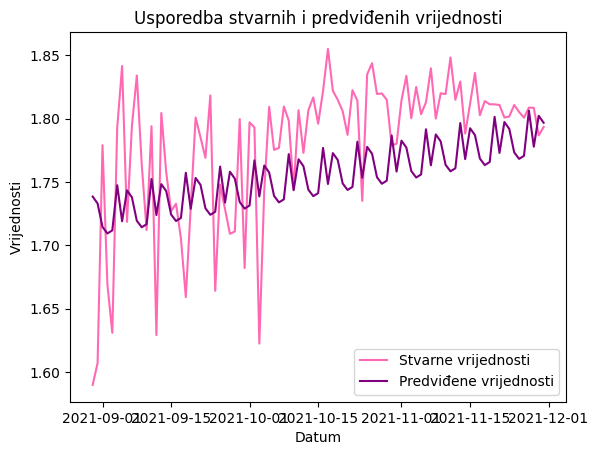

In [ ]:
# Stvarne vrijednosti
plt.plot(comparison_df['Datum'], comparison_df['Stvarne vrijednosti'], label='Stvarne vrijednosti', color='hotpink')

# Predviđene vrijednosti
plt.plot(comparison_df['Datum'], comparison_df['Predviđene vrijednosti'], label='Predviđene vrijednosti', color='purple')

# Postavljanje oznaka i naslova grafa
plt.xlabel('Datum')
plt.ylabel('Vrijednosti')
plt.title('Usporedba stvarnih i predviđenih vrijednosti')
plt.legend()

# Prikaz grafa
plt.show()

In [ ]:
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
print('Prosječna apsolutna pogreška između stvarnih i predviđenih vrijednosti:',mae)
print('Prosječna kvadratna pogreška između stvarnih i predviđenih vrijednosti:',mse)

Prosječna apsolutna pogreška između stvarnih i predviđenih vrijednosti: 0.046547839434575494
Prosječna kvadratna pogreška između stvarnih i predviđenih vrijednosti: 0.0031211508507545025


##4. LSTM model (Long short - term memory)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [ ]:
df

,ds,y
0,2020-08-26,1.434000
1,2020-08-27,1.449600
2,2020-08-28,1.465200
3,2020-08-29,1.480800
4,2020-08-30,1.496400
...,...,...
457,2021-11-26,1.800663
458,2021-11-27,1.808710
459,2021-11-28,1.808488
460,2021-11-29,1.786671


In [ ]:
# Odabir cijene goriva za modeliranje
data = df['y'].values.reshape(-1, 1)

In [ ]:
# Normalizacija podataka
scaler = StandardScaler()
scaler_mm= MinMaxScaler()     #Primjena Min-Max skaliranja rezultira time da svi podaci budu preslikani na raspon između 0 i 1
data_scaled = scaler.fit_transform(data)
data_scaled_mm = scaler_mm.fit_transform(data)

In [ ]:
# Podela podataka na trening i test skup
train_size = int(len(data_scaled) * 0.80)
train_data, test_data = data_scaled[0:train_size, :], data_scaled[train_size:len(data_scaled), :]
train_data_mm, test_data_mm = data_scaled_mm[0:train_size, :], data_scaled_mm[train_size:len(data_scaled), :]

In [ ]:
# Funkcija za transformaciju podataka u sekvence
def create_sequences(data, n_steps):
    x, y = [], []
    for i in range(len(data) - n_steps):
        x.append(data[i:(i + n_steps), 0])
        y.append(data[i + n_steps, 0])
    return np.array(x), np.array(y)

In [ ]:
# Postavljanje hiperparametara
n_steps = 10  # Broj prethodnih koraka za uzimanje u obzir pri predviđanju
n_features = 1  # Broj značajki (u ovom slučaju, samo jedna cijea goriva)

In [ ]:
# Kreiranje sekvenci za trening i test skup
x_train, y_train = create_sequences(train_data, n_steps)
x_test, y_test = create_sequences(test_data, n_steps)

x_train_mm, y_train_mm = create_sequences(train_data_mm, n_steps)
x_test_mm, y_test_mm = create_sequences(test_data_mm, n_steps)

In [ ]:
# Oblikovanje podataka za LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_features))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_features))

x_train_mm = np.reshape(x_train_mm, (x_train_mm.shape[0], x_train_mm.shape[1], n_features))
x_test_mm = np.reshape(x_test_mm, (x_test_mm.shape[0], x_test_mm.shape[1], n_features))

In [ ]:
# Kreiranje LSTM modela
model = Sequential()     #inicijalizacija modela (stvara se prazan model koji će biti sastavljen od više slojeva. )
model.add(LSTM(units=50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(units=1)) #Dodaje se potpuno povezani sloj s jednim izlazom. Ovaj sloj se koristi za stvaranje konačnih izlaza modela.
model.compile(optimizer='adam', loss='mse')  #model se kompilira s određenim optimizatorom i funkcijom gubitka.

In [ ]:
# Treniranje modela
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test),verbose=1)

model.fit(x_train_mm, y_train_mm, epochs=50, batch_size=32, validation_data=(x_test_mm, y_test_mm),verbose=1)

# Predviđanja
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

train_predict_mm = model.predict(x_train_mm)
test_predict_mm = model.predict(x_test_mm)

Epoch 1/50
12/12 [==============================] - 2s 45ms/step - loss: 0.8754 - val_loss: 0.6442
Epoch 2/50
12/12 [==============================] - 0s 19ms/step - loss: 0.7323 - val_loss: 0.3183
Epoch 3/50
12/12 [==============================] - 0s 21ms/step - loss: 0.5950 - val_loss: 0.0713
Epoch 4/50
12/12 [==============================] - 0s 26ms/step - loss: 0.5309 - val_loss: 0.0694
Epoch 5/50
12/12 [==============================] - 0s 17ms/step - loss: 0.5298 - val_loss: 0.0654
Epoch 6/50
12/12 [==============================] - 0s 20ms/step - loss: 0.5206 - val_loss: 0.0677
Epoch 7/50
12/12 [==============================] - 0s 20ms/step - loss: 0.5150 - val_loss: 0.0748
Epoch 8/50
12/12 [==============================] - 0s 18ms/step - loss: 0.5133 - val_loss: 0.0661
Epoch 9/50
12/12 [==============================] - 0s 23ms/step - loss: 0.5093 - val_loss: 0.0690
Epoch 10/50
12/12 [==============================] - 0s 16ms/step - loss: 0.5070 - val_loss: 0.0661
Epoch 11/

In [ ]:
# Transformacija podataka nazad u originalni opseg
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

train_predict_mm = scaler.inverse_transform(train_predict_mm)
y_train_mm = scaler.inverse_transform([y_train_mm])
test_predict_mm = scaler.inverse_transform(test_predict_mm)
y_test_mm = scaler.inverse_transform([y_test_mm])

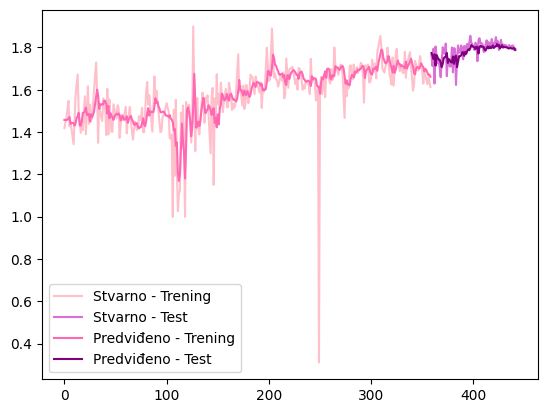

In [ ]:
# Vizualizacija rezultata(StandardScaler)
plt.plot(np.arange(len(y_train[0])), y_train[0], label='Stvarno - Trening',color="pink")
plt.plot(np.arange(len(y_train[0]), len(y_train[0]) + len(y_test[0])), y_test[0], label='Stvarno - Test',color="orchid")
plt.plot(np.arange(len(y_train[0])), train_predict[:, 0], label='Predviđeno - Trening',color="hotpink")
plt.plot(np.arange(len(y_train[0]), len(y_train[0]) + len(y_test[0])), test_predict[:, 0], label='Predviđeno - Test',color="purple")
plt.legend()
plt.show()


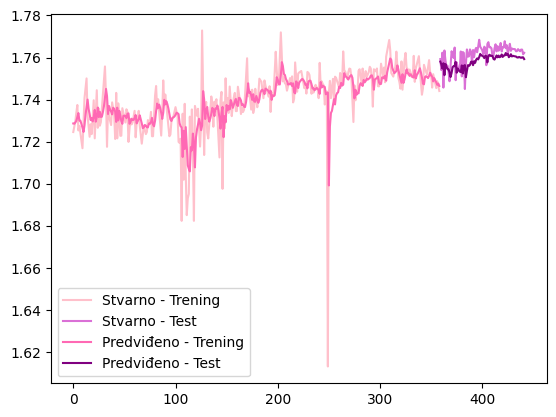

In [ ]:
# Vizualizacija rezultata(MinMaxScaler)
plt.plot(np.arange(len(y_train_mm[0])), y_train_mm[0], label='Stvarno - Trening',color="pink")
plt.plot(np.arange(len(y_train_mm[0]), len(y_train_mm[0]) + len(y_test_mm[0])), y_test_mm[0], label='Stvarno - Test',color="orchid")
plt.plot(np.arange(len(y_train_mm[0])), train_predict_mm[:, 0], label='Predviđeno - Trening',color="hotpink")
plt.plot(np.arange(len(y_train_mm[0]), len(y_train_mm[0]) + len(y_test_mm[0])), test_predict_mm[:, 0], label='Predviđeno - Test',color="purple")
plt.legend()
plt.show()